# DA Final project: Sleep Efficiency

# Group 

# Going Of The Rails

###  Name of students:
Roy Ashkenazi<br>
Zohar Kulp<br>
Oz Kenner<br>



<a id='top'></a>

<div>
<img src="https://github.com/RoidoAsh/project1/blob/main/sleep-share-card.jpeg?raw=true" width="800"/>
</div>


In [173]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [174]:
url = 'https://raw.githubusercontent.com/RoidoAsh/project1/main/Sleep_Efficiency.csv'
Sleep_Efficiency = pd.read_csv(url)
Sleep_Efficiency.shape

(452, 15)

In [175]:
Sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [176]:
Sleep_Efficiency['Smoking status'] = Sleep_Efficiency['Smoking status'].map({'Yes': 1, 'No': 0})
Sleep_Efficiency['Bedtime'] = pd.to_datetime(Sleep_Efficiency['Bedtime'], format='%Y-%m-%d %H:%M:%S')
Sleep_Efficiency['Wakeup time']=pd.to_datetime(Sleep_Efficiency['Wakeup time'],format='%Y-%m-%d %H:%M:%S')

# Extracting just the hour
Sleep_Efficiency['Bedhour'] = Sleep_Efficiency['Bedtime'].dt.hour
Sleep_Efficiency['Wakehour']=Sleep_Efficiency['Wakeup time'].dt.hour
Sleep_Efficiency.drop(['ID'], axis=1, inplace=True)

In [177]:
Sleep_Efficiency.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedhour,Wakehour
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0,1,7
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0,2,9
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0,21,5
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0,2,8
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0,1,9


In [178]:
average_sleep_duration = Sleep_Efficiency.groupby('Gender')['Sleep duration'].mean().reset_index()
average_sleep_duration

,Gender,Sleep duration
0,Female,7.504464
1,Male,7.427632


In [179]:
# Count the number of females and males
gender_counts = Sleep_Efficiency['Gender'].value_counts()
gender_counts

Gender
Male      228
Female    224
Name: count, dtype: int64

Gender  Female  Male
0          224   228


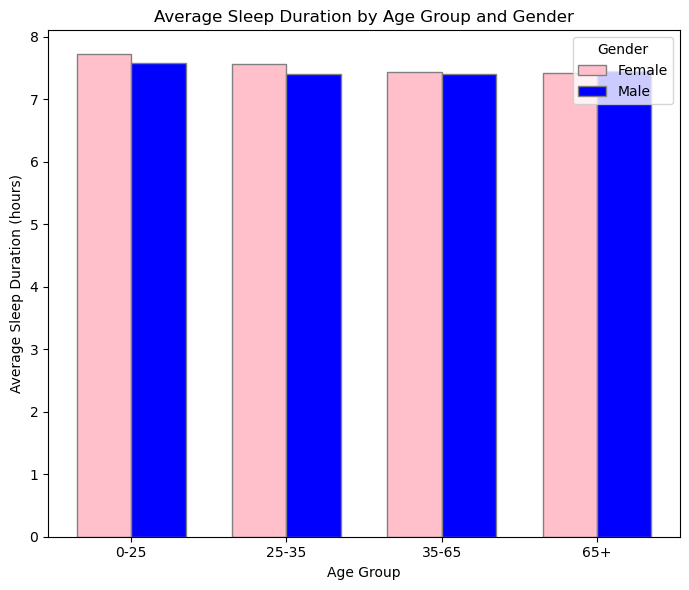

In [180]:
# Count the number of females and males
gender_counts = Sleep_Efficiency['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Pivot the dataframe to have columns for Female and Male counts
gender_counts_pivot = gender_counts.pivot_table(index=None, columns='Gender', values='Count', aggfunc='sum').reset_index(drop=True)

# Display the result
print(gender_counts_pivot)

# Define age groups
bins = [0, 25, 35, 65, 100]
labels = ['0-25', '25-35', '35-65', '65+']

# Add age group to the dataframe
Sleep_Efficiency['Age Group'] = pd.cut(Sleep_Efficiency['Age'], bins=bins, labels=labels, right=False)

# Group by Gender and Age Group and calculate the average Sleep duration
average_sleep_duration_by_age_gender = Sleep_Efficiency.groupby(['Age Group', 'Gender'])['Sleep duration'].mean().reset_index()

# Plotting the data
fig, ax = plt.subplots(figsize=(7, 6))

# Define width of bar
bar_width = 0.35

# Set positions of bars on X axis
r1 = range(len(labels))
r2 = [x + bar_width for x in r1]

# Create a bar plot for females
female_data = average_sleep_duration_by_age_gender[average_sleep_duration_by_age_gender['Gender'] == 'Female']
ax.bar(r1, female_data['Sleep duration'], color='pink', width=bar_width, edgecolor='grey', label='Female')

# Create a bar plot for males
male_data = average_sleep_duration_by_age_gender[average_sleep_duration_by_age_gender['Gender'] == 'Male']
ax.bar(r2, male_data['Sleep duration'], color='blue', width=bar_width, edgecolor='grey', label='Male')

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Sleep Duration (hours)')
ax.set_title('Average Sleep Duration by Age Group and Gender')
ax.set_xticks([r + bar_width / 2 for r in range(len(labels))])
ax.set_xticklabels(labels)
ax.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (2, 4).

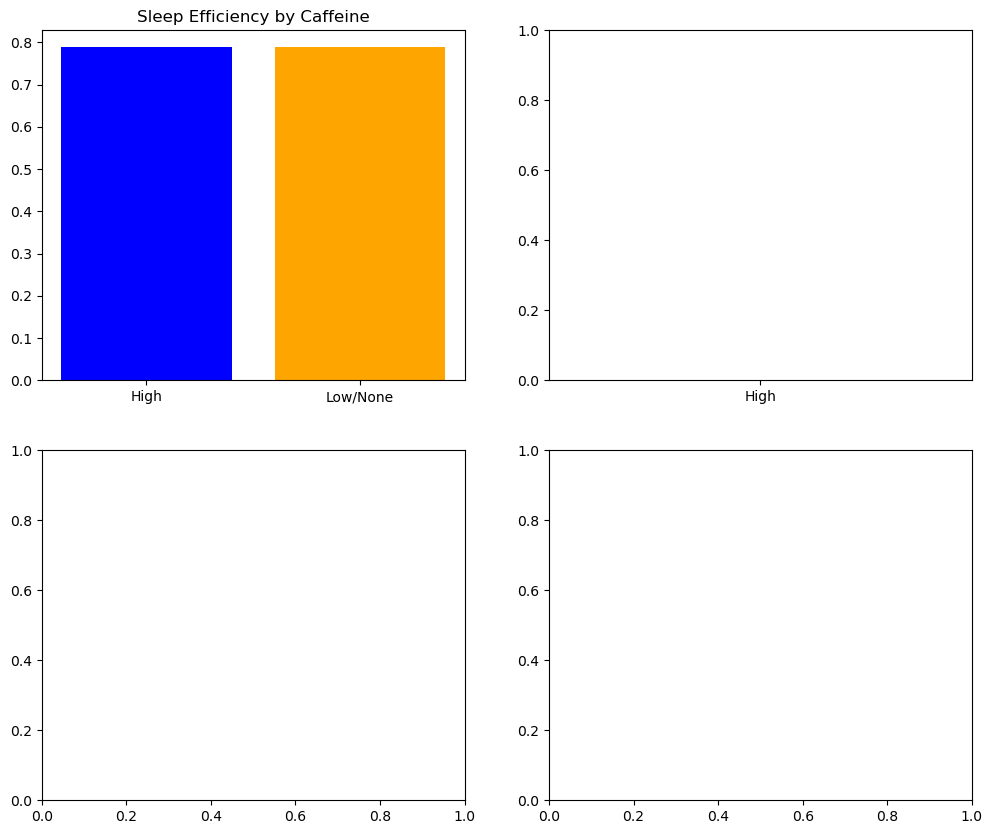

In [155]:
Sleep_Efficiency['Caffeine Category'] = Sleep_Efficiency['Caffeine consumption'].apply(lambda x: 'High' if x >= 50 else 'Low/None')
Sleep_Efficiency['Alcohol Category'] = Sleep_Efficiency['Alcohol consumption'].apply(lambda x: 'High' if x >= 3 else 'Low/None')

# Calculate NREM 1
Sleep_Efficiency['NREM 1'] = 100 - (Sleep_Efficiency['REM sleep percentage'] + Sleep_Efficiency['Deep sleep percentage'] + Sleep_Efficiency['Light sleep percentage'])

# Aggregate data
caffeine_stats = Sleep_Efficiency.groupby('Caffeine Category').agg({'Sleep efficiency': 'mean', 'NREM 1': 'mean', 'Light sleep percentage': 'mean', 'Deep sleep percentage': 'mean', 'REM sleep percentage': 'mean'}).reset_index()
alcohol_stats = Sleep_Efficiency.groupby('Alcohol Category').agg({'Sleep efficiency': 'mean', 'NREM 1': 'mean', 'Light sleep percentage': 'mean', 'Deep sleep percentage': 'mean', 'REM sleep percentage': 'mean'}).reset_index()

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].bar(caffeine_stats['Caffeine Category'], caffeine_stats['Sleep efficiency'], color=['blue', 'orange'])
axes[0, 0].set_title('Sleep Efficiency by Caffeine')
axes[0, 1].bar(caffeine_stats['Caffeine Category'], caffeine_stats[['NREM 1', 'Light sleep percentage', 'Deep sleep percentage', 'REM sleep percentage']], label=['NREM 1', 'Light', 'Deep', 'REM'])
axes[0, 1].set_title('Sleep Stages by Caffeine')
axes[0, 1].legend(['NREM 1', 'Light', 'Deep', 'REM'])

axes[1, 0].bar(alcohol_stats['Alcohol Category'], alcohol_stats['Sleep efficiency'], color=['blue', 'orange'])
axes[1, 0].set_title('Sleep Efficiency by Alcohol')
axes[1, 1].bar(alcohol_stats['Alcohol Category'], alcohol_stats[['NREM 1', 'Light sleep percentage', 'Deep sleep percentage', 'REM sleep percentage']], label=['NREM 1', 'Light', 'Deep', 'REM'])
axes[1, 1].set_title('Sleep Stages by Alcohol')
axes[1, 1].legend(['NREM 1', 'Light', 'Deep', 'REM'])

plt.tight_layout()
plt.show()

<Axes: xlabel='Exercise frequency', ylabel='Count'>

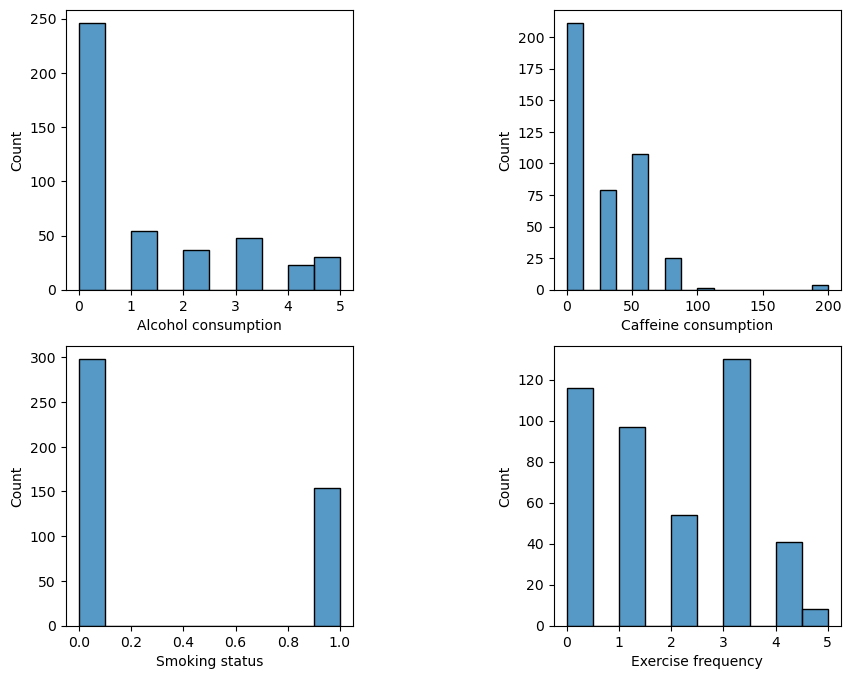

In [156]:
fig, ax = plt.subplots(2,2, figsize = (10,8)) # יוצר את הדיאגרמות 
plt.subplots_adjust(wspace = 0.7) # יוצר את הדיאגרמה 

sns.histplot(data=Sleep_Efficiency, x ='Alcohol consumption', ax = ax[0,0] ) # בוחרים מהוא ציר האיקס ולאחר מכן אני רושם לו לאיזה איור אני רוצה שיכניס לי את הנתונים, זה יכניס לי את הנתונים לאיור הראשון מצד שמאל 
# הדיפולט לציר ה - y הוא count
sns.histplot(data=Sleep_Efficiency, x='Caffeine consumption', stat='count', ax = ax[0,1]) # ציר ה y נקבע לפי מה שאני רושם לו כלומר לפי מה אני רוצה שיציג לי לפי מילים שמורות בפייתון
sns.histplot(data=Sleep_Efficiency, x='Smoking status', stat='count', ax = ax[1,0])
sns.histplot(data=Sleep_Efficiency, x='Exercise frequency', stat='count', ax = ax[1,1])

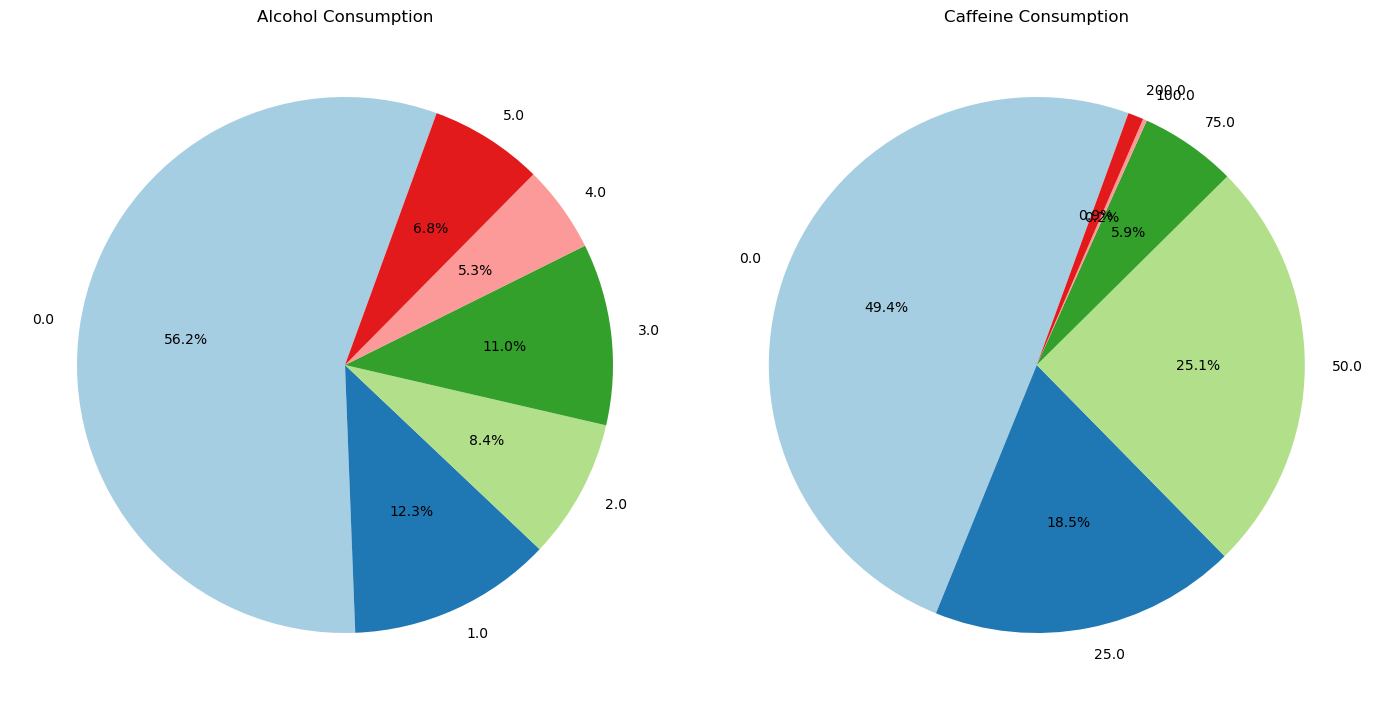

In [157]:
# Group by Alcohol consumption and count the number of people
alcohol_consumption = Sleep_Efficiency['Alcohol consumption'].value_counts().sort_index()

# Group by Caffeine consumption and count the number of people
caffeine_consumption = Sleep_Efficiency['Caffeine consumption'].value_counts().sort_index()

# Create the pie charts
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Alcohol consumption
axs[0].pie(alcohol_consumption.values, labels=alcohol_consumption.index, autopct='%1.1f%%', startangle=70, colors=plt.cm.Paired.colors)
axs[0].set_title('Alcohol Consumption')

# Pie chart for Caffeine consumption
axs[1].pie(caffeine_consumption.values, labels=caffeine_consumption.index, autopct='%1.1f%%', startangle=70, colors=plt.cm.Paired.colors)
axs[1].set_title('Caffeine Consumption')

# Display the plots
plt.tight_layout()
plt.show()

In [89]:
Alcohol and Caffeine Consumption:
We analyzed the number of people who consume alcohol and caffeine.

SyntaxError: invalid syntax (2885080467.py, line 1)

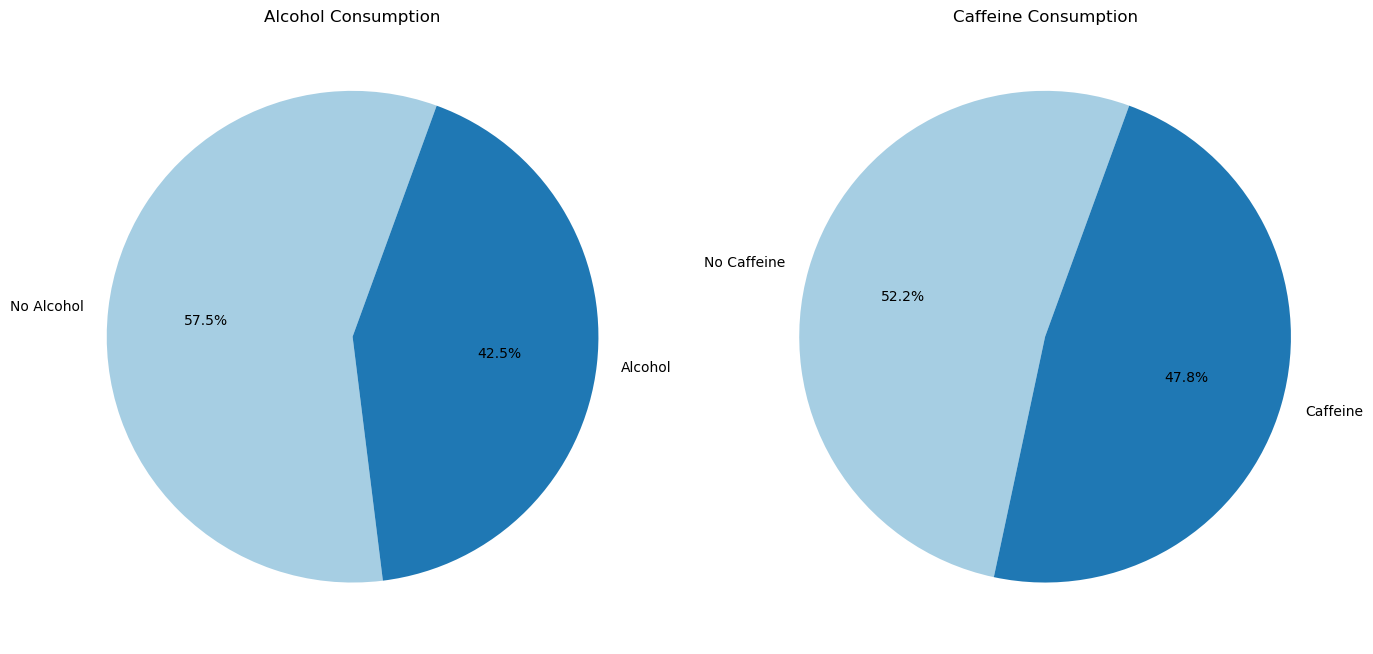

In [158]:
# Create categories for Alcohol consumption
alcohol_consumption = Sleep_Efficiency['Alcohol consumption'] > 0
alcohol_counts = alcohol_consumption.value_counts().sort_index()
alcohol_labels = ['No Alcohol', 'Alcohol']

# Create categories for Caffeine consumption
caffeine_consumption = Sleep_Efficiency['Caffeine consumption'] > 0
caffeine_counts = caffeine_consumption.value_counts().sort_index()
caffeine_labels = ['No Caffeine', 'Caffeine']

# Create the pie charts
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Alcohol consumption
axs[0].pie(alcohol_counts.values, labels=alcohol_labels, autopct='%1.1f%%', startangle=70, colors=plt.cm.Paired.colors)
axs[0].set_title('Alcohol Consumption')

# Pie chart for Caffeine consumption
axs[1].pie(caffeine_counts.values, labels=caffeine_labels, autopct='%1.1f%%', startangle=70, colors=plt.cm.Paired.colors)
axs[1].set_title('Caffeine Consumption')

# Display the plots
plt.tight_layout()
plt.show()

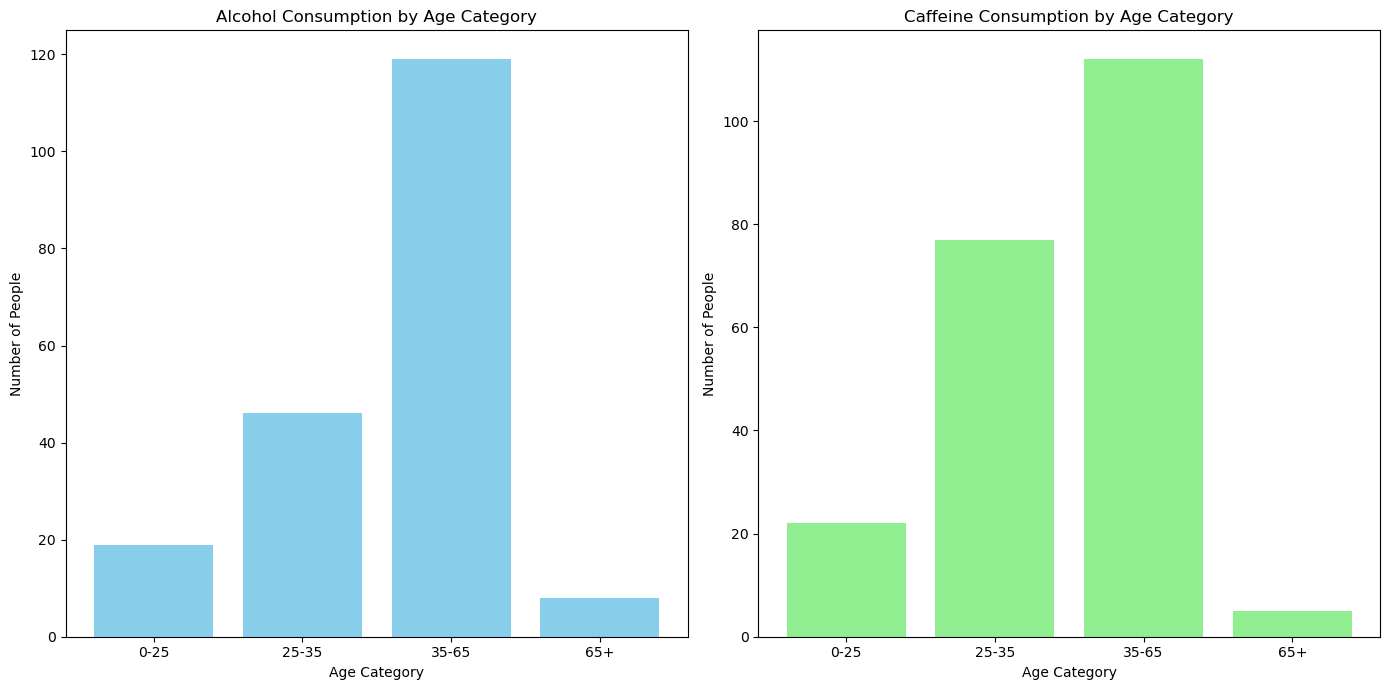

In [159]:

# Define age categories
bins = [0, 25, 35, 65, float('inf')]
labels = ['0-25', '25-35', '35-65', '65+']
Sleep_Efficiency['Age Category'] = pd.cut(Sleep_Efficiency['Age'], bins=bins, labels=labels, right=False)

# Group by age category and count the number of people who consume alcohol
alcohol_consumers = Sleep_Efficiency[Sleep_Efficiency['Alcohol consumption'] > 0]
alcohol_counts_by_age = alcohol_consumers['Age Category'].value_counts().reindex(labels, fill_value=0)

# Group by age category and count the number of people who consume caffeine
caffeine_consumers = Sleep_Efficiency[Sleep_Efficiency['Caffeine consumption'] > 0]
caffeine_counts_by_age = caffeine_consumers['Age Category'].value_counts().reindex(labels, fill_value=0)

# Create the bar plots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Bar plot for Alcohol consumption by age category
axs[0].bar(alcohol_counts_by_age.index, alcohol_counts_by_age.values, color='skyblue')
axs[0].set_title('Alcohol Consumption by Age Category')
axs[0].set_xlabel('Age Category')
axs[0].set_ylabel('Number of People')

# Bar plot for Caffeine consumption by age category
axs[1].bar(caffeine_counts_by_age.index, caffeine_counts_by_age.values, color='lightgreen')
axs[1].set_title('Caffeine Consumption by Age Category')
axs[1].set_xlabel('Age Category')
axs[1].set_ylabel('Number of People')

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
Age Group with Highest Consumption:
Visualized the distribution of consumers and non-consumers in different age categories: 0-25, 25-35, 35-65, 65+.
Identified the age group 35-65 as the highest consumers of alcohol and caffeine.

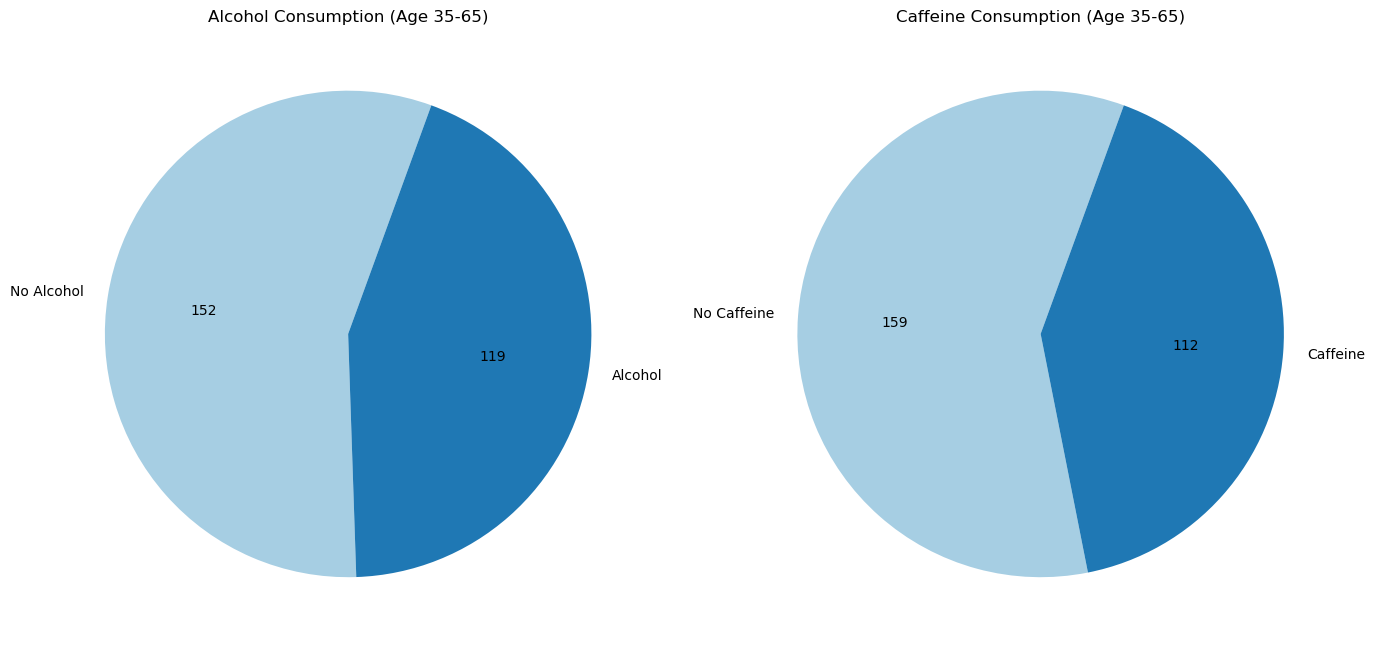

In [160]:
# Define age categories
bins = [0, 25, 35, 65, float('inf')]
labels = ['0-25', '25-35', '35-65', '65+']
Sleep_Efficiency['Age Category'] = pd.cut(Sleep_Efficiency['Age'], bins=bins, labels=labels, right=False)

# Filter the dataset for the 35-65 age group
age_group_35_65 = Sleep_Efficiency[Sleep_Efficiency['Age Category'] == '35-65']

# Count the number of people who consume and do not consume alcohol in this age group
alcohol_consumption = age_group_35_65['Alcohol consumption'] > 0
alcohol_counts = alcohol_consumption.value_counts().sort_index()
alcohol_labels = ['No Alcohol', 'Alcohol']

# Count the number of people who consume and do not consume caffeine in this age group
caffeine_consumption = age_group_35_65['Caffeine consumption'] > 0
caffeine_counts = caffeine_consumption.value_counts().sort_index()
caffeine_labels = ['No Caffeine', 'Caffeine']

# Create the pie charts
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Function to display absolute numbers on pie chart
def absolute_value(val):
    total = sum(alcohol_counts)
    return int(round(val/100*total, 0))

# Pie chart for Alcohol consumption
axs[0].pie(alcohol_counts.values, labels=alcohol_labels, autopct=lambda p: '{:.0f}'.format(p * sum(alcohol_counts) / 100), startangle=70, colors=plt.cm.Paired.colors)
axs[0].set_title('Alcohol Consumption (Age 35-65)')

# Pie chart for Caffeine consumption
axs[1].pie(caffeine_counts.values, labels=caffeine_labels, autopct=lambda p: '{:.0f}'.format(p * sum(caffeine_counts) / 100), startangle=70, colors=plt.cm.Paired.colors)
axs[1].set_title('Caffeine Consumption (Age 35-65)')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
Created pie charts to show the proportion of consumers and non-consumers within this age group.
35-65

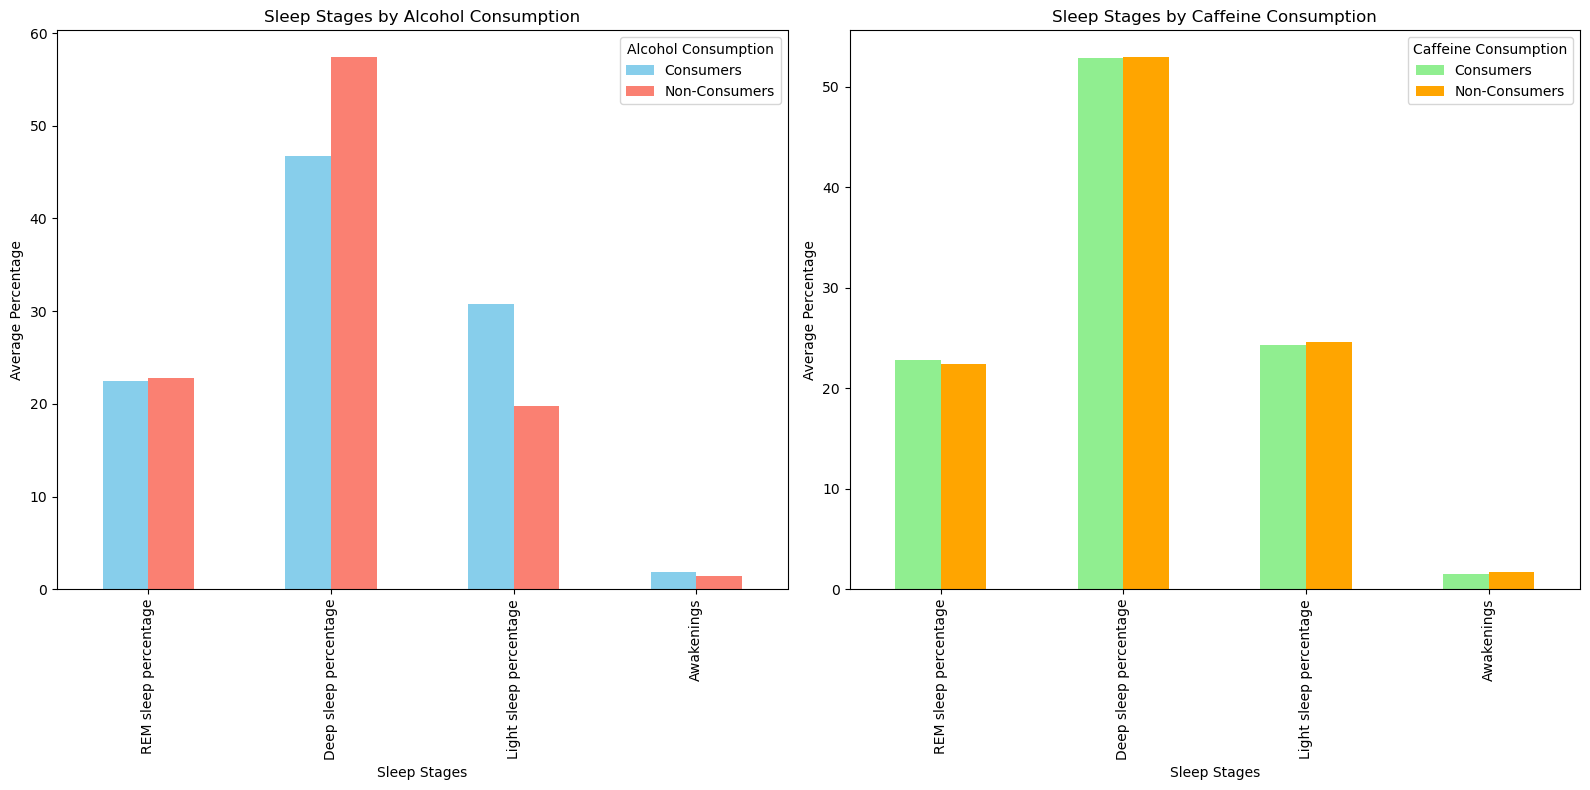

In [161]:
# Define groups based on alcohol consumption
alcohol_consumers = Sleep_Efficiency[Sleep_Efficiency['Alcohol consumption'] > 0]
alcohol_non_consumers = Sleep_Efficiency[Sleep_Efficiency['Alcohol consumption'] == 0]

# Define groups based on caffeine consumption
caffeine_consumers = Sleep_Efficiency[Sleep_Efficiency['Caffeine consumption'] > 0]
caffeine_non_consumers = Sleep_Efficiency[Sleep_Efficiency['Caffeine consumption'] == 0]

# Calculate average sleep stage percentages for alcohol groups
alcohol_groups = {
    'Consumers': alcohol_consumers[['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings']].mean(),
    'Non-Consumers': alcohol_non_consumers[['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings']].mean()
}

# Calculate average sleep stage percentages for caffeine groups
caffeine_groups = {
    'Consumers': caffeine_consumers[['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings']].mean(),
    'Non-Consumers': caffeine_non_consumers[['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings']].mean()
}

# Create bar plots for alcohol consumption
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot for alcohol consumption
ax1 = axs[0]
alcohol_df = pd.DataFrame(alcohol_groups)
alcohol_df.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Sleep Stages by Alcohol Consumption')
ax1.set_xlabel('Sleep Stages')
ax1.set_ylabel('Average Percentage')
ax1.legend(title='Alcohol Consumption')

# Bar plot for caffeine consumption
ax2 = axs[1]
caffeine_df = pd.DataFrame(caffeine_groups)
caffeine_df.plot(kind='bar', ax=ax2, color=['lightgreen', 'orange'])
ax2.set_title('Sleep Stages by Caffeine Consumption')
ax2.set_xlabel('Sleep Stages')
ax2.set_ylabel('Average Percentage')
ax2.legend(title='Caffeine Consumption')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
Sleep Stages Analysis:

We compared the average percentages of REM sleep, deep sleep, light sleep, and the number of awakenings between consumers and non-consumers of alcohol and caffeine.
Effects on Sleep:

Alcohol consumption is associated with changes in sleep pattern, affecting sleep quality and duration.
Caffeine consumption does not show a significant impact on sleep stages, indicating that other factors might play a more critical role in sleep quality for caffeine consumers.


<Axes: >

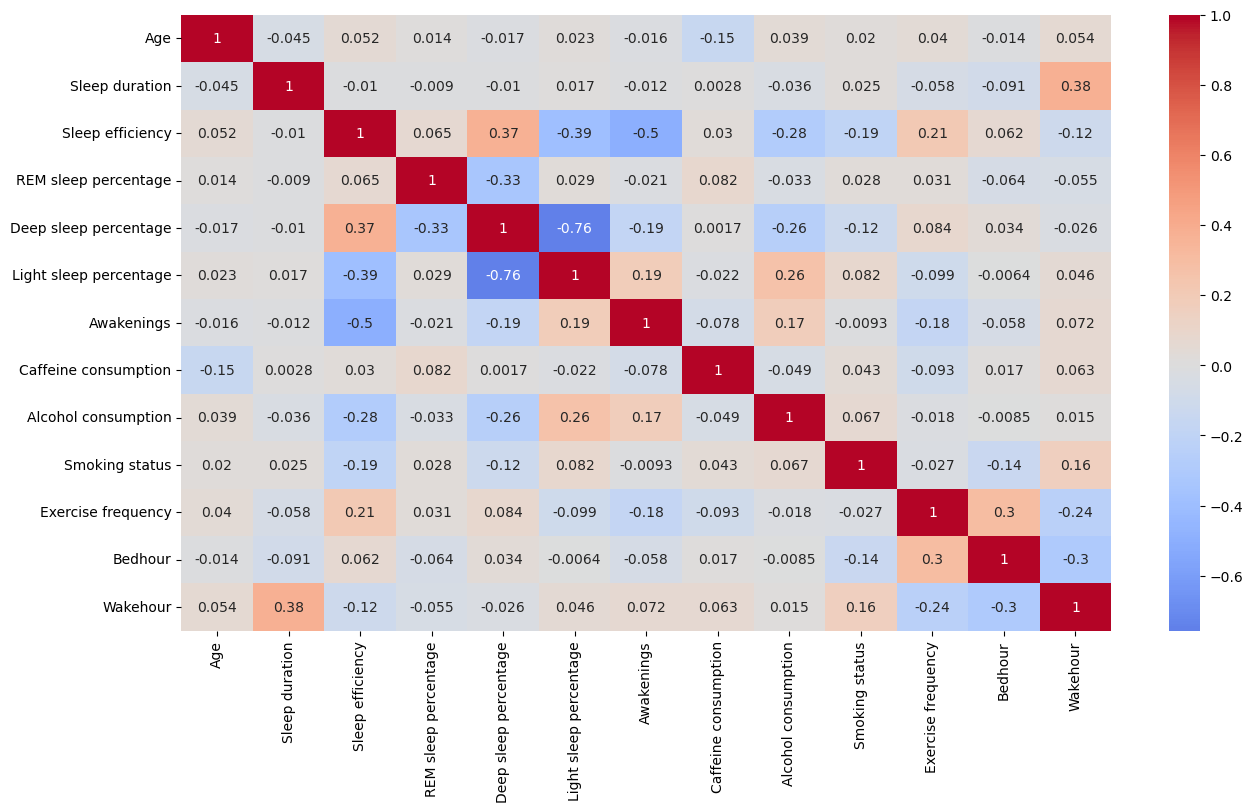

In [181]:
corrs = Sleep_Efficiency.corr(method = 'kendall', numeric_only=True)
plt.figure(figsize=(15,8))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True) #מקגל את אותה טבלה שיש למעלה עם צבעים, ככל שמתקרבים למספר אחד הצבע יותר אדום

Text(0.5, 1.0, 'Correlation Heatmap')

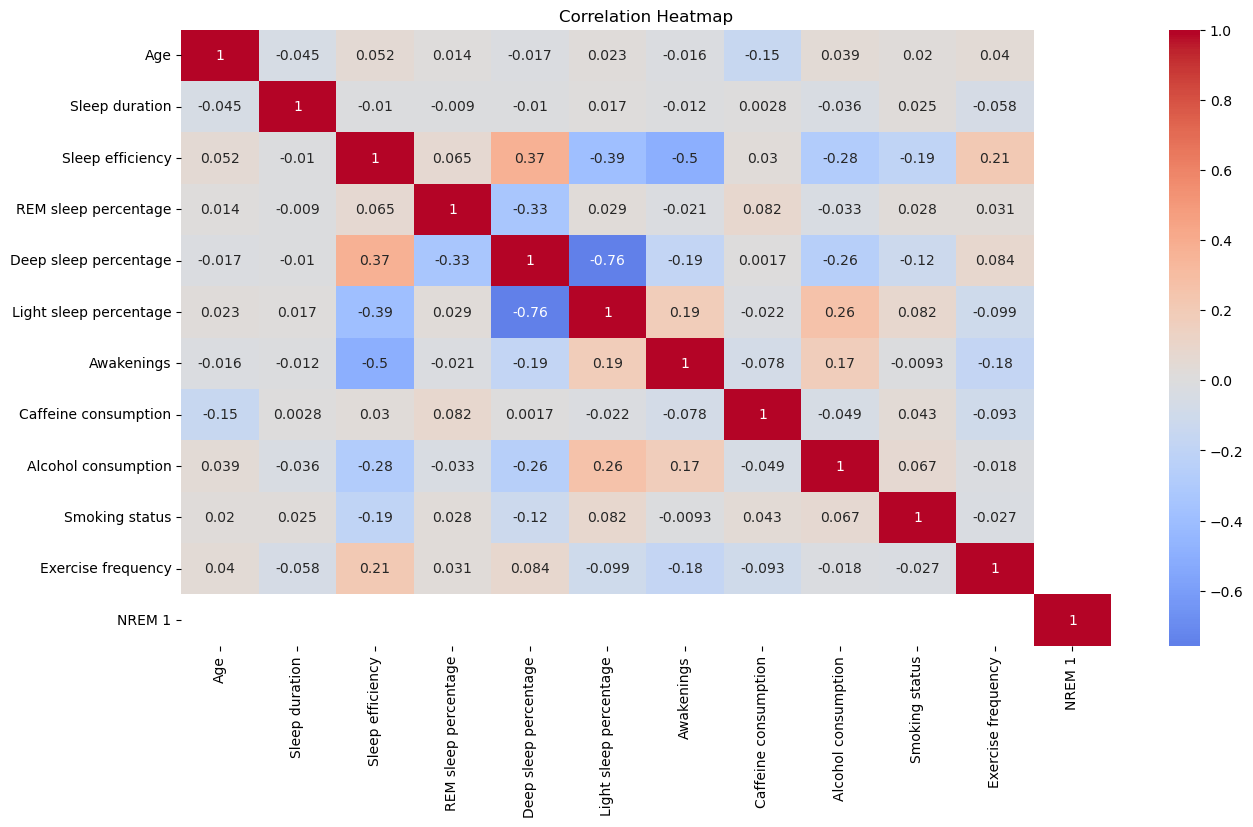

In [163]:
corrs = Sleep_Efficiency.corr(method='kendall', numeric_only=True)
plt.figure(figsize=(15, 8))  # figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot=True)
plt.title('Correlation Heatmap')

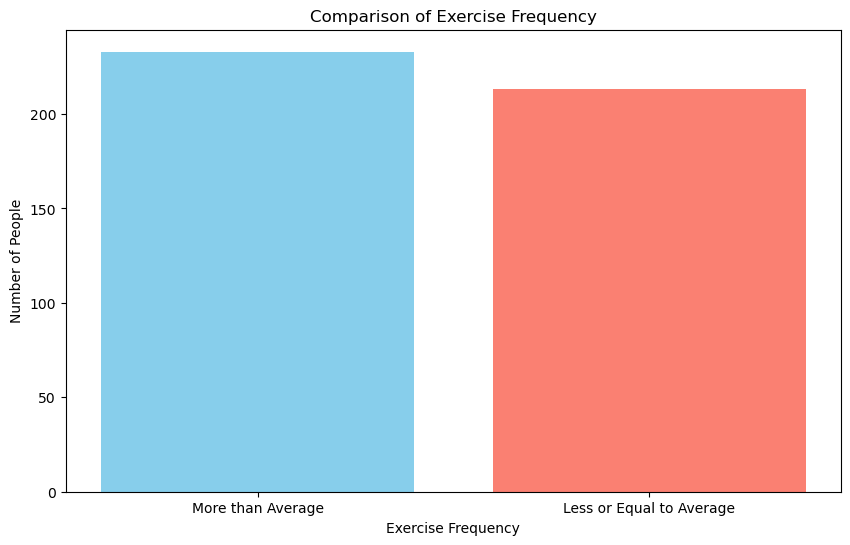

In [188]:
# Calculate the average exercise frequency
average_exercise_frequency = Sleep_Efficiency['Exercise frequency'].mean()

# Split the data into two groups
high_exercise = Sleep_Efficiency[Sleep_Efficiency['Exercise frequency'] > average_exercise_frequency]
low_exercise = Sleep_Efficiency[Sleep_Efficiency['Exercise frequency'] <= average_exercise_frequency]

# Calculate the number of people in each group
high_exercise_count = len(high_exercise)
low_exercise_count = len(low_exercise)

# Create a bar chart
labels = ['More than Average', 'Less or Equal to Average']
counts = [high_exercise_count, low_exercise_count]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.xlabel('Exercise Frequency')
plt.ylabel('Number of People')
plt.title('Comparison of Exercise Frequency')
plt.show()


In [189]:
average_exercise_frequency = Sleep_Efficiency['Exercise frequency'].mean()
average_exercise_frequency

1.7914798206278026

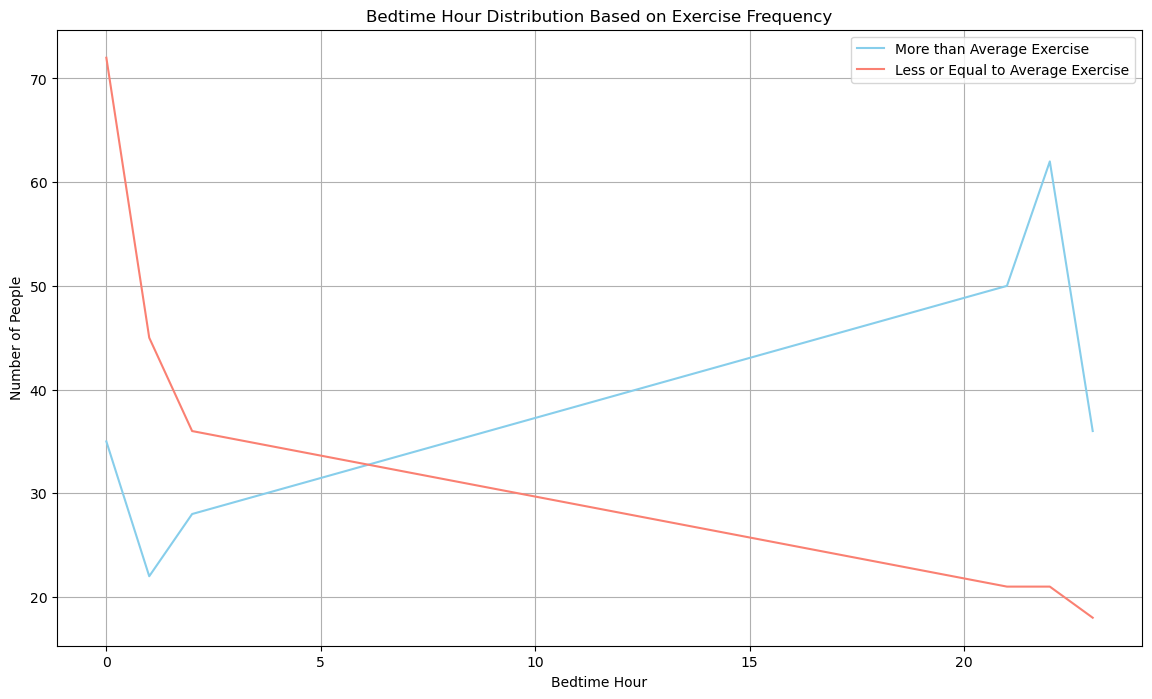

In [194]:
# Split the data into two groups
high_exercise = Sleep_Efficiency[Sleep_Efficiency['Exercise frequency'] > average_exercise_frequency]
low_exercise = Sleep_Efficiency[Sleep_Efficiency['Exercise frequency'] <= average_exercise_frequency]

# Ensure 'Bedhour' is in the dataset
if 'Bedhour' not in Sleep_Efficiency.columns:
    # Extract the hour from 'Bedtime' if 'Bedhour' doesn't exist
    Sleep_Efficiency['Bedhour'] = pd.to_datetime(Sleep_Efficiency['Bedtime'], format='%d/%m/%Y %H:%M').dt.hour

# Group by bedhour and count the occurrences for each group
high_exercise_bedhour = high_exercise['Bedhour'].value_counts().sort_index()
low_exercise_bedhour = low_exercise['Bedhour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(14, 8))

# Plot for high exercise group
plt.plot(high_exercise_bedhour.index, high_exercise_bedhour.values, label='More than Average Exercise', color='skyblue')

# Plot for low exercise group
plt.plot(low_exercise_bedhour.index, low_exercise_bedhour.values, label='Less or Equal to Average Exercise', color='salmon')

plt.xlabel('Bedtime Hour')
plt.ylabel('Number of People')
plt.title('Bedtime Hour Distribution Based on Exercise Frequency')
plt.legend()
plt.grid(True)
plt.show()